In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

influencers = pd.read_csv("influencers_data.csv")
influencers

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [2]:
influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [3]:
# Dropping the column country because of missing values the column country is insignificant to the clustering that we're about to perform
influencers = influencers.drop("country", axis=1)

In [4]:
influencers

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b
...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b


In [5]:
# Converting posts
posts = list(influencers['posts'])
posts

['3.3k',
 '6.9k',
 '0.89k',
 '1.8k',
 '6.8k',
 '5.6k',
 '5.0k',
 '2.0k',
 '4.1k',
 '7.4k',
 '0.66k',
 '10.0k',
 '0.95k',
 '0.53k',
 '3.2k',
 '1.4k',
 '6.4k',
 '4.4k',
 '1.2k',
 '5.3k',
 '2.0k',
 '8.2k',
 '3.5k',
 '1.6k',
 '0.08k',
 '4.8k',
 '2.3k',
 '10.0k',
 '6.9k',
 '5.2k',
 '7.3k',
 '10.0k',
 '0.69k',
 '1.3k',
 '1.7k',
 '1.8k',
 '3.6k',
 '3.6k',
 '0.87k',
 '2.0k',
 '10.0k',
 '3.3k',
 '1.5k',
 '1.9k',
 '2.9k',
 '1.2k',
 '2.3k',
 '12.9k',
 '2.5k',
 '0.86k',
 '0.54k',
 '1.8k',
 '0.26k',
 '1.2k',
 '2.9k',
 '0.34k',
 '1.2k',
 '1.0k',
 '7.0k',
 '0.78k',
 '2.9k',
 '1.4k',
 '17.5k',
 '5.1k',
 '0.83k',
 '8.2k',
 '1.9k',
 '2.4k',
 '10.0k',
 '0.82k',
 '9.9k',
 '1.2k',
 '2.7k',
 '10.0k',
 '2.7k',
 '0.28k',
 '2.0k',
 '0.88k',
 '3.3k',
 '1.3k',
 '0.87k',
 '1.7k',
 '10.0k',
 '0.66k',
 '3.2k',
 '5.6k',
 '1.2k',
 '0.42k',
 '4.6k',
 '3.6k',
 '2.1k',
 '2.2k',
 '10.0k',
 '0.84k',
 '10.0k',
 '10.3k',
 '2.4k',
 '0.42k',
 '0.60k',
 '2.7k',
 '1.1k',
 '6.4k',
 '0.06k',
 '2.5k',
 '0.15k',
 '8.9k',
 '6.5k',
 

In [6]:
# Converting followers
# 创建一个空列表来存储转换后的粉丝数量
temp_posts = list()

# 遍历 posts 列表中的每个元素
for i in posts:
    # 如果元素包含 'k'
    if 'k' in i:
        # 去掉 'k'，将剩余的部分转换为浮点数，并乘以1000
        new_i = 1000 * float(i.replace('k', ''))
        # 将结果添加到 temp_posts 列表中
        temp_posts.append(new_i)
    else:
        # 如果不包含 'k'，直接将元素转换为浮点数并添加到 temp_posts 列表中
        temp_posts.append(float(i))

# 输出转换后的粉丝数量列表
temp_posts


[3300.0,
 6900.0,
 890.0,
 1800.0,
 6800.0,
 5600.0,
 5000.0,
 2000.0,
 4100.0,
 7400.0,
 660.0,
 10000.0,
 950.0,
 530.0,
 3200.0,
 1400.0,
 6400.0,
 4400.0,
 1200.0,
 5300.0,
 2000.0,
 8200.0,
 3500.0,
 1600.0,
 80.0,
 4800.0,
 2300.0,
 10000.0,
 6900.0,
 5200.0,
 7300.0,
 10000.0,
 690.0,
 1300.0,
 1700.0,
 1800.0,
 3600.0,
 3600.0,
 870.0,
 2000.0,
 10000.0,
 3300.0,
 1500.0,
 1900.0,
 2900.0,
 1200.0,
 2300.0,
 12900.0,
 2500.0,
 860.0,
 540.0,
 1800.0,
 260.0,
 1200.0,
 2900.0,
 340.0,
 1200.0,
 1000.0,
 7000.0,
 780.0,
 2900.0,
 1400.0,
 17500.0,
 5100.0,
 830.0,
 8200.0,
 1900.0,
 2400.0,
 10000.0,
 820.0,
 9900.0,
 1200.0,
 2700.0,
 10000.0,
 2700.0,
 280.0,
 2000.0,
 880.0,
 3300.0,
 1300.0,
 870.0,
 1700.0,
 10000.0,
 660.0,
 3200.0,
 5600.0,
 1200.0,
 420.0,
 4600.0,
 3600.0,
 2100.0,
 2200.0,
 10000.0,
 840.0,
 10000.0,
 10300.0,
 2400.0,
 420.0,
 600.0,
 2700.0,
 1100.0,
 6400.0,
 60.0,
 2500.0,
 150.0,
 8900.0,
 6500.0,
 6500.0,
 1300.0,
 1400.0,
 170.0,
 980.0,
 3500.0,

In [7]:
influencers['posts'] = temp_posts
influencers['posts']

0      3300.0
1      6900.0
2       890.0
3      1800.0
4      6800.0
        ...  
195    2300.0
196    3800.0
197     770.0
198    2300.0
199    4200.0
Name: posts, Length: 200, dtype: float64

In [8]:
influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    object 
 5   avg_likes          200 non-null    object 
 6   60_day_eng_rate    200 non-null    object 
 7   new_post_avg_like  200 non-null    object 
 8   total_likes        200 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ KB


In [9]:
# Converting Followers
# 将 influencers['followers'] 列表中的值复制到 original 列表中
original = list(influencers['followers'])

# 创建一个空列表来存储转换后的粉丝数量
temp = list()

# 遍历 original 列表中的每个元素
for i in original:
    # 如果元素包含 'k'
    if 'k' in i:
        # 去掉 'k'，将剩余的部分转换为浮点数，并乘以1000
        new_i = 1000 * float(i.replace('k', ''))
        # 将结果添加到 temp 列表中
        temp.append(new_i)
        
    # 如果元素包含 'm'
    elif 'm' in i:
        # 去掉 'm'，将剩余的部分转换为浮点数，并乘以1000000
        new_i = 1000000 * float(i.replace('m', ''))
        # 将结果添加到 temp 列表中
        temp.append(new_i)

    # 如果元素不包含 'k' 或 'm'
    else:
        # 直接将元素转换为浮点数并添加到 temp 列表中
        temp.append(float(i))

# 将转换后的 temp 列表赋值回 influencers['followers'] 中
influencers['followers'] = temp

# 输出转换后的粉丝数量列表
influencers['followers']


0      475800000.0
1      366200000.0
2      357300000.0
3      342700000.0
4      334100000.0
          ...     
195     33200000.0
196     33200000.0
197     33200000.0
198     33000000.0
199     32800000.0
Name: followers, Length: 200, dtype: float64

In [10]:
# Converting Followers
original = list(influencers['avg_likes'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
        
    elif 'm' in i:
        new_i = 1000000  * float(i.replace('m', ''))
        temp.append(new_i)

    else:
        temp.append(float(i))

influencers['avg_likes'] = temp
influencers['avg_likes']

0      8700000.0
1      8300000.0
2      6800000.0
3      6200000.0
4      1900000.0
         ...    
195     623800.0
196     390400.0
197     193300.0
198     719600.0
199     232200.0
Name: avg_likes, Length: 200, dtype: float64

In [11]:
# Converting Followers
original = list(influencers['new_post_avg_like'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
        
    elif 'm' in i:
        new_i = 1000000  * float(i.replace('m', ''))
        temp.append(new_i)

    else:
        temp.append(float(i))

influencers['new_post_avg_like'] = temp
influencers['new_post_avg_like']

0      6500000.0
1      5900000.0
2      4400000.0
3      3300000.0
4       665300.0
         ...    
195     464700.0
196     208000.0
197      82600.0
198     467700.0
199      97400.0
Name: new_post_avg_like, Length: 200, dtype: float64

In [12]:
# Converting Followers
original = list(influencers['total_likes'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
        
    elif 'm' in i:
        new_i = 1000000  * float(i.replace('m', ''))
        temp.append(new_i)
        
    elif 'b' in i:
        new_i = 1000000000  * float(i.replace('b', ''))
        temp.append(new_i)

    else:
        temp.append(float(i))

influencers['total_likes'] = temp
influencers['total_likes']

0      2.900000e+10
1      5.740000e+10
2      6.000000e+09
3      1.150000e+10
4      1.250000e+10
           ...     
195    1.400000e+09
196    1.500000e+09
197    1.492000e+08
198    1.700000e+09
199    9.691000e+08
Name: total_likes, Length: 200, dtype: float64

In [13]:
influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    200 non-null    object 
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 14.2+ KB


In [14]:
influencers

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39%,6500000.0,2.900000e+10
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62%,5900000.0,5.740000e+10
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24%,4400000.0,6.000000e+09
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97%,3300000.0,1.150000e+10
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20%,665300.0,1.250000e+10
...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40%,464700.0,1.400000e+09
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64%,208000.0,1.500000e+09
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26%,82600.0,1.492000e+08
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42%,467700.0,1.700000e+09


In [15]:
new_influencers = influencers.drop('channel_info', axis=1)
new_influencers = new_influencers.drop('60_day_eng_rate', axis=1)

C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

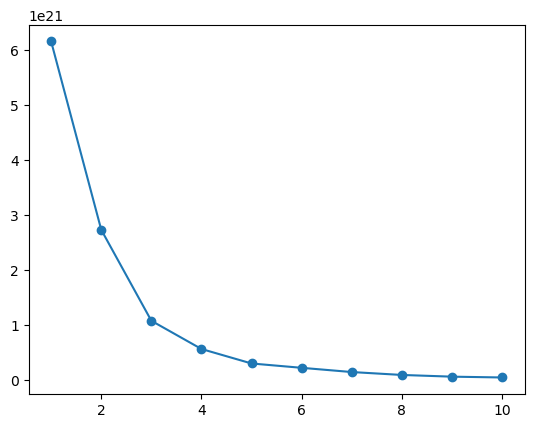

In [16]:
# 从 sklearn.cluster 导入 KMeans 类
from sklearn.cluster import KMeans

# 创建一个空列表来存储每种簇数量对应的簇内误差平方和（inertia）
clustercol = []

# 遍历 1 到 10 的数字，表示不同的簇数量
for i in range(1, 11):
    # 初始化 KMeans 聚类模型，设置簇数量为 i
    km = KMeans(n_clusters=i)
    # 对数据 new_influencers 进行聚类，并计算簇内误差平方和
    km.fit_predict(new_influencers)
    # 将当前簇数量的误差平方和添加到 clustercol 列表中
    clustercol.append(km.inertia_)

# 创建绘图对象
fig, ax = plt.subplots()

# 绘制簇数量与簇内误差平方和的折线图
ax.plot(range(1, 11), clustercol, '-o')

# 显示图表
plt.show()


C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

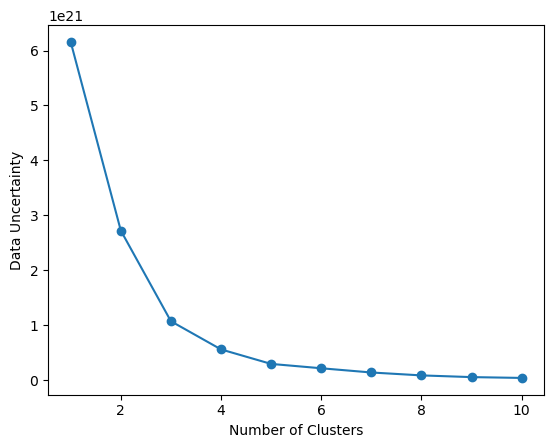

In [17]:
# 从 sklearn.cluster 导入 KMeans 类
from sklearn.cluster import KMeans

# 创建一个空列表来存储每种簇数量对应的簇内误差平方和（inertia）
clustercol = []

# 遍历 1 到 10 的数字，表示不同的簇数量
for i in range(1, 11):
    # 初始化 KMeans 聚类模型，设置簇数量为 i
    km = KMeans(n_clusters=i)
    # 对数据 new_influencers 进行聚类，并计算簇内误差平方和
    km.fit_predict(new_influencers)
    # 将当前簇数量的误差平方和添加到 clustercol 列表中
    clustercol.append(km.inertia_)

# 创建图形和坐标轴对象
fig, ax = plt.subplots()

# 绘制簇数量与簇内误差平方和的折线图
ax.plot(range(1, 11), clustercol, '-o')

# 设置横轴标签为“Number of Clusters”（簇的数量）
ax.set_xlabel("Number of Clusters")

# 设置纵轴标签为“Data Uncertainty”（数据不确定性，即簇内误差平方和）
ax.set_ylabel("Data Uncertainty")

# 显示图表
plt.show()


In [18]:
kmeans = KMeans(n_clusters = 4, random_state = 40)
kmeans.fit(new_influencers)
new_influencers['clusters'] = kmeans.predict(new_influencers)
new_influencers

C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pin77\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes,clusters
0,1,92,3300.0,475800000.0,8700000.0,6500000.0,2.900000e+10,3
1,2,91,6900.0,366200000.0,8300000.0,5900000.0,5.740000e+10,1
2,3,90,890.0,357300000.0,6800000.0,4400000.0,6.000000e+09,0
3,4,93,1800.0,342700000.0,6200000.0,3300000.0,1.150000e+10,0
4,5,91,6800.0,334100000.0,1900000.0,665300.0,1.250000e+10,3
...,...,...,...,...,...,...,...,...
195,196,71,2300.0,33200000.0,623800.0,464700.0,1.400000e+09,2
196,197,81,3800.0,33200000.0,390400.0,208000.0,1.500000e+09,2
197,198,79,770.0,33200000.0,193300.0,82600.0,1.492000e+08,2
198,199,78,2300.0,33000000.0,719600.0,467700.0,1.700000e+09,2


In [19]:
cluster_means = new_influencers.groupby('clusters').mean()
cluster_means

,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes
clusters,,,,,,,
0,53.925000,83.850000,4900.250000,1.103725e+08,2.413960e+06,1.836538e+06,6.555000e+09
1,2.000000,91.000000,6900.000000,3.662000e+08,8.300000e+06,5.900000e+06,5.740000e+10
2,118.840000,80.713333,2993.066667,5.543200e+07,1.457082e+06,9.273313e+05,1.681483e+09
3,12.777778,90.222222,5344.444444,2.651111e+08,3.777778e+06,2.573922e+06,1.775556e+10


In [20]:
# 定义 k 为 7，表示需要找出与 total_likes 相关性最强的前 7 个特征
k = 7

# 计算 influencers 数据集中各个数值型特征之间的相关性矩阵
correlation = influencers.corr(numeric_only=True)

# 找出与 total_likes 相关性最强的前 k 个特征，并提取出它们的列名
cols = correlation.nlargest(k, "total_likes")['total_likes'].index

# 打印出这些特征的列名
print(cols)


Index(['total_likes', 'followers', 'avg_likes', 'new_post_avg_like',
       'influence_score', 'posts', 'rank'],
      dtype='object')


<Axes: >

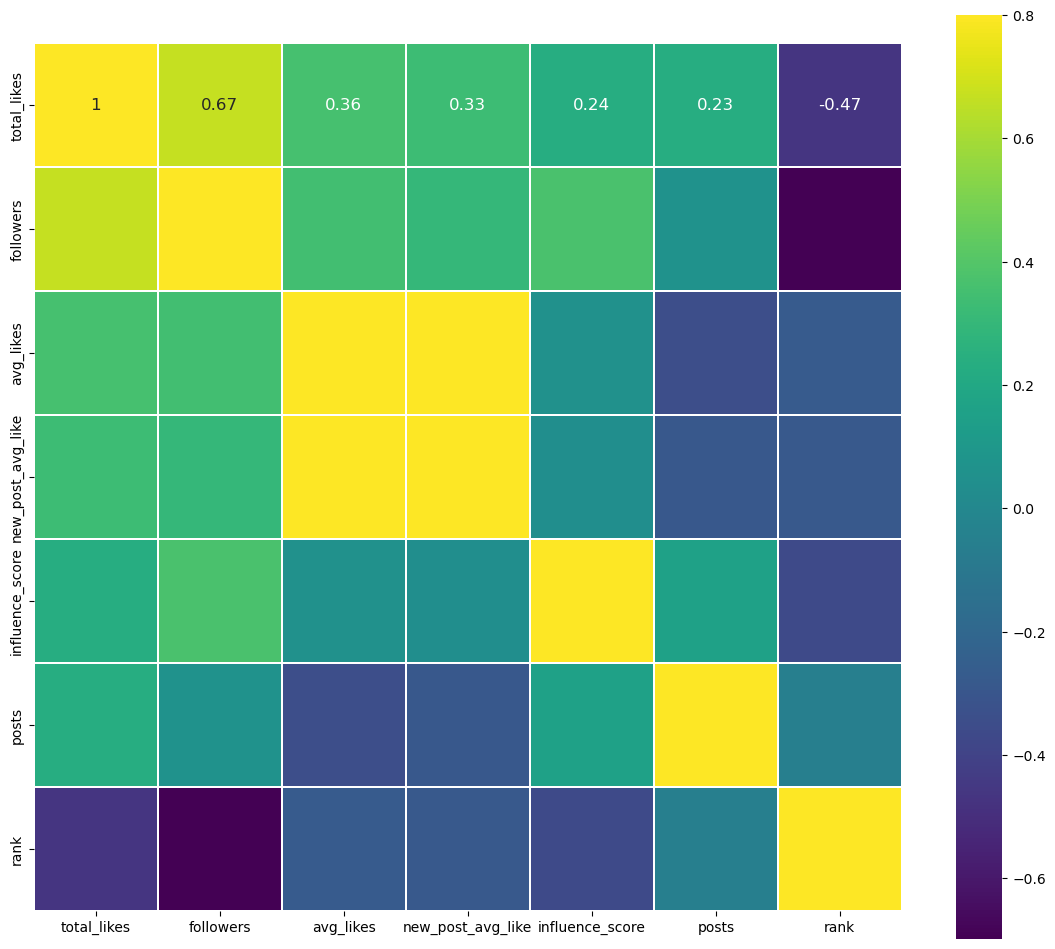

In [21]:
# 计算 influencers 数据集中 cols 特征之间的相关性矩阵
cm = np.corrcoef(influencers[cols].values.T)

# 创建一个绘图对象和坐标轴对象，设置图表大小为 14x12 英寸
fig, ax = plt.subplots(figsize=(14,12))

# 使用 seaborn 库绘制相关性矩阵的热力图
sns.heatmap(
    cm,                   # 输入相关性矩阵
    vmax=.8,              # 设置颜色最大值为 0.8
    linewidth=0.01,       # 设置方格之间的分割线宽度
    square=True,          # 设置每个方格为正方形
    annot=True,           # 显示每个方格中的相关性系数
    cmap='viridis',       # 设置颜色映射为 viridis 配色方案
    xticklabels=cols.values,  # 设置 x 轴标签为特征名称
    yticklabels=cols.values,  # 设置 y 轴标签为特征名称
    annot_kws={'size': 12}    # 设置注释文字的大小为 12
)

# cm = np.corrcoef(influencers[cols].values.T)

# fig, ax = plt.subplots(figsize=(14,12))
# sns.heatmap(cm, vmax=.8, linewidth=0.01, square=True, annot = True, cmap='viridis', xticklabels=cols.values, annot_kws = {'size': 12}, yticklabels=cols.values)

In [22]:
k = 7

correlation = new_influencers.corr()
cols = correlation.nlargest(k, "total_likes")['total_likes'].index

print(cols)

Index(['total_likes', 'followers', 'avg_likes', 'new_post_avg_like',
       'influence_score', 'posts', 'clusters'],
      dtype='object')


<Axes: >

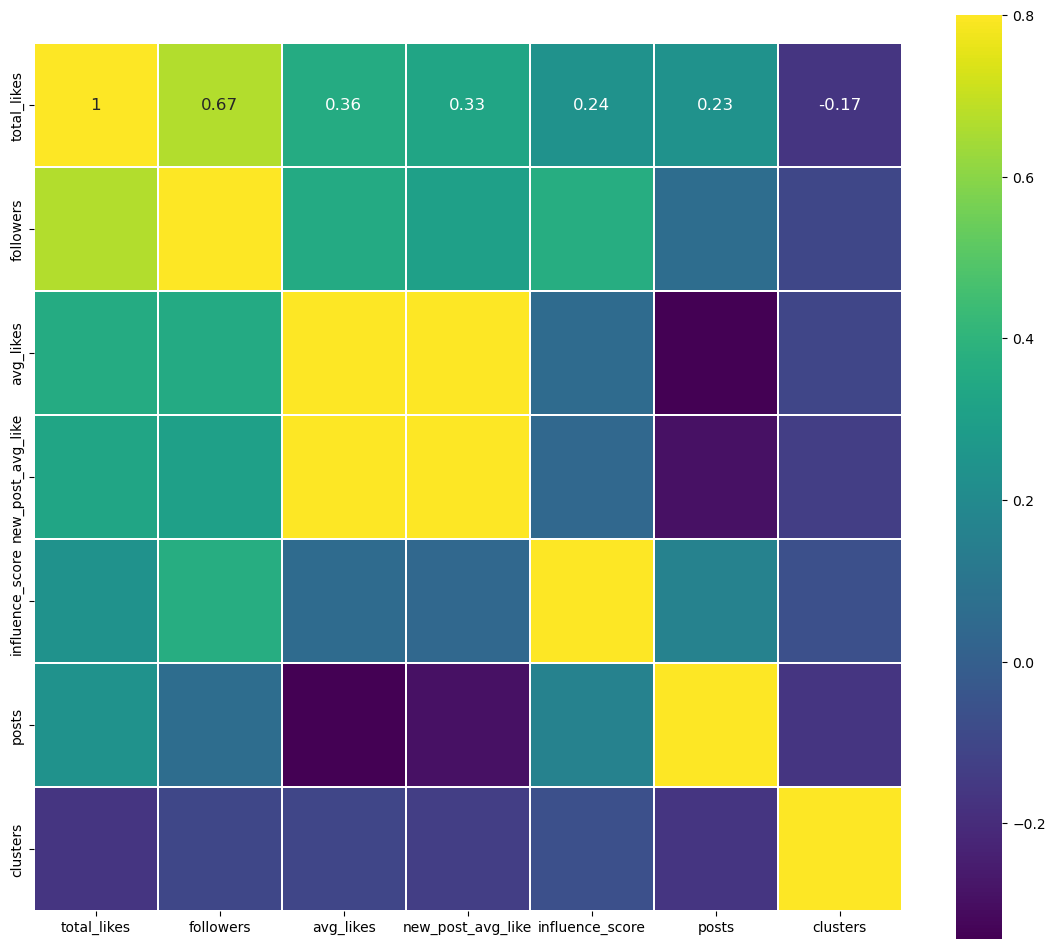

In [23]:
cm = np.corrcoef(new_influencers[cols].values.T)

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=.8, linewidth=0.01, square = True, annot = True, cmap='viridis', xticklabels=cols.values, annot_kws = {'size': 12}, yticklabels=cols.values)